# Pricing Vanilla Options Using Black - Scholes Model

The objective of this project is to perform pricing of vanilla options using the object-oriented approach.


### Steps followed

1. Extracting the relevant parameters: Historical stock price, Risk free interest rate
2. Calculating the implied volatility using brute force iterative method
3. Implementing the object oriented programming for pricing the vanilla options
4. Setting up class and constructor
5. Defining the parameters: Stock price, Strike price, Interest rate, Dividend yield, Expiry, Volatility
6. Calculating d1 and d2
7. Implementing the closed form solution based on the Black-Scholes equation
8. Plotting the option prices against strike prices


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 320) 
pd.set_option('display.max_rows', 100) #maximum number of rows
pd.options.display.float_format = '{:,.2f}'.format #Disable scientific notation 
import scipy.stats as si
import matplotlib.pyplot as plt
from scipy.stats import norm

The following are the Black-Scholes-Merton option pricing formulas:

$$Call price = S*\exp{(-q*t)}*N(d_1) - K*\exp{(-r*t)}*N(d_2)$$

$$Put price = K*\exp{(-r*t)}*N(-d_2) - S*\exp{(-q*t)}*N(-d_1)$$


Explaining the notations:
1. S - Stock price
2. q - Dividend yield
3. r - Risk free interest rate
4. t - Time to maturity
5. K - Strike price

## 1. Implementing the Object Oriented Programming Approach

### 1.1 Setting parameters 

The focus of the project is to price the Tesla stock options using the Black-Scholes Model. 

As at 31 March 2023 the Tesla option was trading at a closing price of 207.46. We will price a call option with a strike price of 125 expiring on 15 September 2022 (representing 126 trading days to maturity). Please see the snip below:

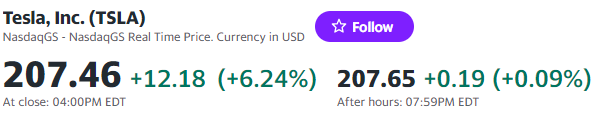

### 1.2 Estimating Short-Term Interest Rate 

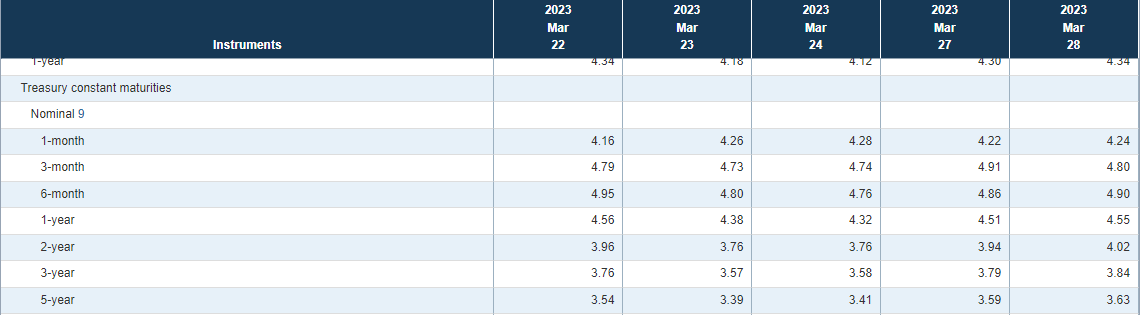

In [3]:
six_month_risk_free_rate = 0.0495

### 1.3 Estimating Volatility 

#### 1.3.1 Implied Volatility Call Option

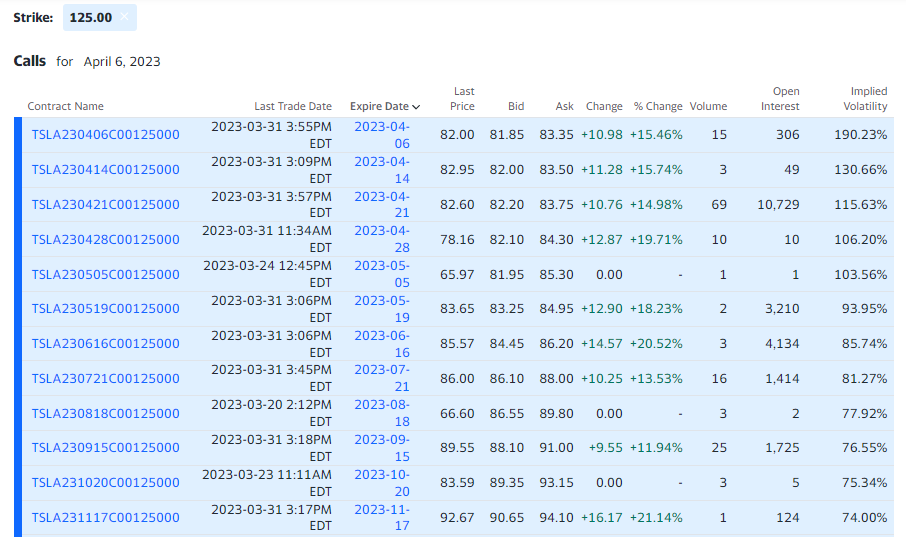

We shall use a brute force iterative method to calculate the implied volatility. The numpy array of the possible volatility paths  contains approximately 40,000 possible solutions. In the code below, we simply iterate through all the possible solutions with an aim of finding that one that minimizes the absolute difference between the observed price and the Black-Scholes price (i.e., finding the root of the function).

In [5]:
N = norm.cdf
# Setting up the Black Scholes Formula for the call option 
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * N(d1) -  N(d2)* K * np.exp(-r * T)
    return call

# Implementing the Brute Force method
vol_paths = np.arange(0.01,4,0.0001)
price_diff = np.zeros_like(vol_paths)
observed_price = 89.55
S = 207.46 # The stock price as at 31st March 2023
K = 125
r = six_month_risk_free_rate
T = 126/252

for i in range(len(vol_paths)):
    vol = vol_paths[i]
    price_diff[i] = observed_price - black_scholes_call(S, K , T, r, vol)
    
idx = np.argmin(abs(price_diff))
implied_vol_call = vol_paths[idx]
print('The Implied volatility for option is:', implied_vol_call)

The Implied volatility for option is: 0.6330999999999962


In [6]:
# Validating the calculated implied volatility
black_scholes_call(S, K, T, r, implied_vol_call)

89.54998876946964

#### 1.3.2  Implied Volatility Put Option

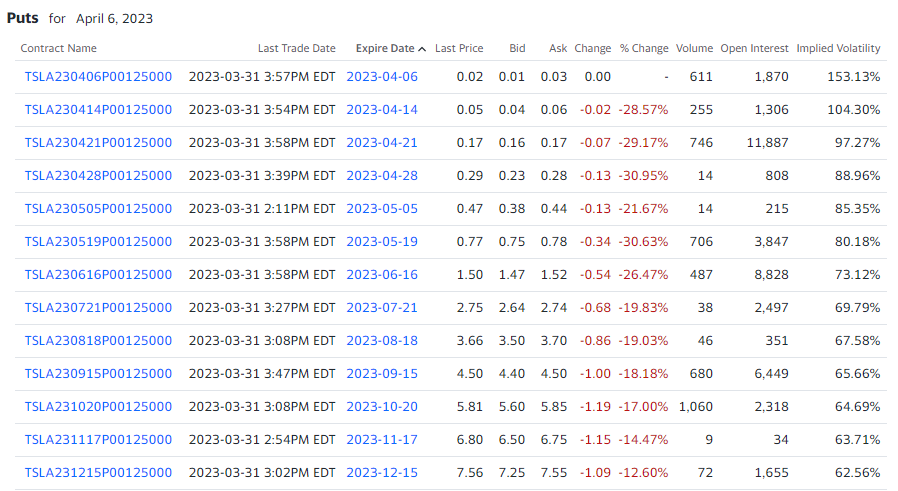

In [7]:
# Setting up the Black Scholes Formula for the put option 
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put = np.exp(-r * T) * K * N(-d2)- S * N(-d1)
    return put

# Implementing the Brute Force method
vol_paths = np.arange(0.01,4,0.0001)
price_diff = np.zeros_like(vol_paths)
observed_price = 4.50
S = 207.46 # The stock price as at 31st March 2023
Put_K = 125
r = six_month_risk_free_rate
T = 126/252

for i in range(len(vol_paths)):
    vol = vol_paths[i]
    price_diff[i] = observed_price - black_scholes_put(S, K , T, r, vol)
    
idx = np.argmin(abs(price_diff))
implied_vol_put = vol_paths[idx]
print('The Implied volatility for option is:', implied_vol_put)

The Implied volatility for option is: 0.6541999999999961


In [8]:
# Validating the calculated implied volatility
black_scholes_put(S, K, T, r, implied_vol_put)

4.500801212652263

### 1.4 Implementing Object Oriented Programming for Option Pricing  

In [9]:
class BSM_Model:
    def __init__(self, option_type, price, strike, interest_rate, expiry, volatility, dividend_yield=0):
        self.s = price # Underlying asset price
        self.k = strike # Option strike price
        self.r = interest_rate # Continuous risk fee rate
        self.q = dividend_yield # Dividend continuous rate
        self.T = expiry # time to expiry (year)
        self.sigma = volatility # Underlying volatility
        self.type = option_type # option type "p" represents put option while type "c" represents call option
        
    def N(self, d):
        return si.norm.cdf(d)
    
    def norm_phi_pdf(self, d):
        return norm.pdf(d)
    def d1(self):
        d1=(np.log(self.s/self.k)+(self.r-self.q+0.5*self.sigma**2)*self.T)/(self.sigma*np.sqrt(self.T))
        return d1
    
    def d2(self):
        d2 = (np.log(self.s / self.k) + (self.r - self.q - 0.5*self.sigma**2)*self.T) / (self.sigma *np.sqrt(self.T))
        return d2
    def BSM_price(self):
        d1=self.d1()
        d2 = d1-self.sigma*np.sqrt(self.T)
        if self.type == 'c':
            price =np.exp(-self.r*self.T)*(self.s*np.exp((self.r-self.q)*self.T)*self.N(d1) - self.k*self.N(d2))
            call_price = self.s*np.exp(-self.q*self.T)*self.N(d1)- self.k*np.exp(-self.r*self.T)*self.N(d2)
            return call_price
        elif self.type == 'p':
            put_price = self.k*np.exp(-self.r*self.T)*self.N(-d2) - self.s*np.exp(-self.q*self.T)*self.N(-d1)
            return put_price
        else:
            print ("option type can only be call or put")


### 1.5 Pricing Tesla Options

#### 1.5.1 Call Option

In [10]:
Tesla_Call_125 = BSM_Model('c', S, K, r, T, implied_vol_call)#S,K,r,T,v
Tesla_Call_125.BSM_price()

89.54998876946964

#### 1.5.2 Put Option

In [11]:
Tesla_Put_125 = BSM_Model('p', S, K, r, T, implied_vol_put)#S,K,r,T,v
Tesla_Put_125.BSM_price()

4.500801212652263

## 1.2 Plotting the Option price curve Relative to Strikes

In [12]:
# An array of strike prices
np.linspace(30, 50, 10)

array([30.        , 32.22222222, 34.44444444, 36.66666667, 38.88888889,
       41.11111111, 43.33333333, 45.55555556, 47.77777778, 50.        ])

In [13]:
# Applying the strike prices in the BSM model
strikes = np.linspace(100, 200, 10)
call_prices = BSM_Model('c', strikes, K , r, T, implied_vol_call).BSM_price()
put_prices = BSM_Model('p', strikes ,K , r, T, implied_vol_put).BSM_price()

Text(0.5, 1.0, 'Call Option Price Curve Relative to Strikes')

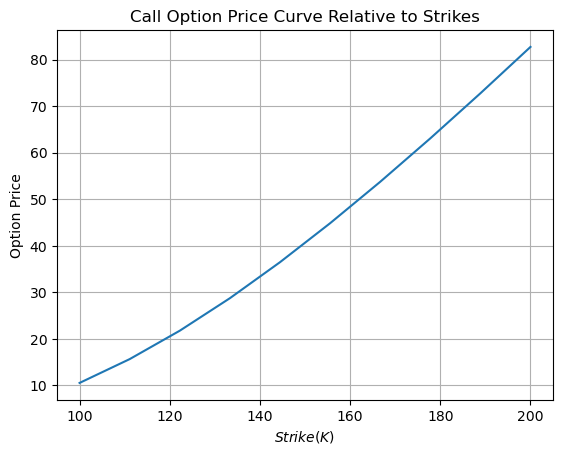

In [14]:
# plotting the call prices against strike prices
plt.plot(strikes, call_prices)
plt.grid()
plt.xlabel("$Strike (K)$")
plt.ylabel("Option Price")
plt.title("Call Option Price Curve Relative to Strikes")

Text(0.5, 1.0, 'Put Option Price Curve Relative to Strikes')

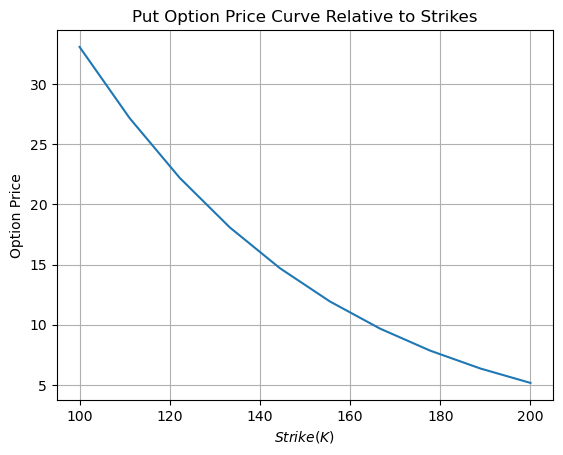

In [15]:
# plotting the call prices against strike prices
plt.plot(strikes, put_prices)
plt.xlabel("$Strike (K)$")
plt.ylabel("Option Price")
plt.grid()
plt.title("Put Option Price Curve Relative to Strikes")

(c) Brian Sylvester Okusi - March 2023